<a href="https://colab.research.google.com/github/shahiryar/conflict-modelling/blob/main/Conflict_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Problem statement
The objective of this project is to develop a predictive model using Support Vector Machines (SVM) to determine the likelihood of conflicts or civil unrest in a specific region or country. By analyzing historical data and various socio-economic, political, and demographic factors, the model aims to provide early warning indicators and insights that can help policymakers and organizations proactively address potential conflicts.



# TODOs:
- Change Target variable to number of instances of conflicts
- Feature selection
- Feature scaling
- Deal with Categorical Data

# Data Needs

## Data Needed

The data needed:
> Socio-Economic Indicator
* Year
* GDP
* Gini Coef
* Literacy Rate
* health indicators
* infrstructure development
* employment level
* percent of labor force by total population
* dependency ratio
* income level
* per captia income
* umemployment rate

> Political Idicators
* World Wide Governance Indicator
* Democracy Index
* poltical Instability Task Force

> Demographic
* Ethnic/Religion make up
* population density
* urbanisation rate
* size of middle class 
* migration patterns
* age structure (middle quantile)

> Environmental
* per captia water availabilty
* deforestation rate
* Climate change impact
* natural disaster

> Conflict Related
* Type of Conflict/unrest
* Casualities
* number of conflicts (in the year under review)

[Link](https://colab.research.google.com/drive/1bO-ccukQ-ZdE8mIQwBhHYU3ysM_sjC3b#scrollTo=l48gd4osbfAP)

## Code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/20year-world-soci-politico-economic.csv', na_values='..', )

In [5]:
df.head()

,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",...,Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST],Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Coverage of social safety net programs in poorest quintile (% of population) [per_sa_allsa.cov_q1_tot],International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]"
0,2022,YR2022,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,YR2022,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.928,4.699
2,2022,YR2022,Bhutan,BTN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.670,3.604
3,2022,YR2022,India,IND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.224,7.330
4,2022,YR2022,Maldives,MDV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.126,4.883


## Data Cleaning

In [6]:
df.describe()

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS],GDP per capita (constant LCU) [NY.GDP.PCAP.KN],Gross capital formation (constant LCU) [NE.GDI.TOTL.KN],Trade (% of GDP) [NE.TRD.GNFS.ZS],...,Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST],Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Coverage of social safety net programs in poorest quintile (% of population) [per_sa_allsa.cov_q1_tot],International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]"
count,4280.000000,4266.000000,4266.000000,4729.000000,4544.000000,4676.000000,653.000000,3.895000e+03,2.897000e+03,4360.000000,...,3701.000000,3869.000000,3861.000000,3853.000000,394.000000,411.000000,428.000000,784.000000,4692.000000,4692.000000
mean,62.561839,53.009329,72.741742,80.797980,75.377445,90.595375,57.602542,2.060684e+06,4.820892e+13,85.742416,...,1.970373,-0.027057,-0.027847,-0.022646,36.225760,20.665637,52.998388,10.218443,16.874527,7.732645
std,37.923590,41.188944,34.310303,28.071220,33.601625,17.446701,29.153401,1.242495e+07,4.829748e+14,55.922315,...,1.438138,0.999585,0.995386,0.998810,42.421437,18.227067,28.794172,15.260712,11.237297,5.356714
min,0.000000,0.000000,0.000000,0.643132,0.522863,3.429757,0.400000,3.608784e+02,-8.634937e+15,0.756876,...,0.005400,-3.312951,-2.590877,-2.313395,0.242614,0.370971,0.000000,0.052003,0.304000,0.095000
25%,23.075000,6.788960,46.613441,66.170357,52.408893,90.090456,33.390000,1.605809e+04,1.394515e+10,53.211282,...,1.143856,-0.667904,-0.791663,-0.857851,25.008318,5.402161,28.941540,1.373828,9.174912,4.174250
50%,78.850000,54.650000,93.000000,98.091935,96.720040,99.595647,55.350000,4.992233e+04,1.702352e+11,72.435251,...,1.615470,0.069970,-0.181318,0.024783,33.241091,11.515865,53.903945,3.663202,14.344520,6.320000
75%,99.900000,99.900000,100.000000,100.000000,100.000000,100.000000,85.380000,3.404266e+05,1.397067e+12,102.383770,...,2.380104,0.839443,0.764781,0.876453,42.483496,36.338993,79.367049,11.739982,22.256000,9.854250
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.768178e+08,6.152640e+15,863.195099,...,20.865745,1.965062,2.124782,1.800992,811.547901,59.520414,99.858678,88.404048,78.778000,37.320000


In [7]:
df_cf = pd.read_csv('/content/drive/MyDrive/Datasets/ucdp-nonstate-221.csv')

In [8]:
df_cf.columns

Index(['conflict_id', 'dyad_id', 'org', 'side_a_name', 'side_a_name_fulltext',
       'side_a_name_mothertongue', 'side_a_id', 'side_a_components',
       'side_a_2nd', 'gwno_a_2nd', 'side_b_name', 'side_b_name_fulltext',
       'side_b_name_mothertongue', 'side_b_id', 'side_b_components',
       'side_b_2nd', 'gwno_b_2nd', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'year',
       'best_fatality_estimate', 'low_fatality_estimate',
       'high_fatality_estimate', 'location', 'gwno_location', 'region',
       'version'],
      dtype='object')

In [9]:
features=['year', 'location', 'best_fatality_estimate']
df_cf = df_cf[features]
df_cf['location'] = df_cf.location.str.split(',')

In [10]:
df_cf = df_cf.explode('location').reset_index(drop=True)
df_cf.head()

,year,location,best_fatality_estimate
0,2021,Nigeria,41
1,2013,Guinea,98
2,2021,Sudan,412
3,2005,Sudan,130
4,2017,Sudan,41


In [11]:
df_cf['location'] = df_cf.location.str.strip()

In [12]:
features = ['year', 'country', 'best_fatality_estimate']
df_cf.columns= features
df_cf.head()

,year,country,best_fatality_estimate
0,2021,Nigeria,41
1,2013,Guinea,98
2,2021,Sudan,412
3,2005,Sudan,130
4,2017,Sudan,41


In [13]:
df_cf.sort_values('year', inplace=True)

In [14]:
print(len(df.columns))
features = ['year', 'year_code', 'country', 'country_code', 'clean_fuel_access', 'clean_fuel_access_rural', 
            'clean_fuel_access_urban', 'electricity', 'electricity_rural', 'electricity_urban',
            'financial_acc_ownership', 'gdp_pc', 'gcf', 'trade', 'houshold_consumption', 'primary_intake',
            'out_of_school', 'compulsory_edu', 'education_bs_eq', 'literacy_rate_youth', 'literacy_rate_female',
            'literacy_rate_male', 'literacy_rate_total', 'co2_em', 'water_stress', 'pm2.5_above_who', 'pm2.5_expo',
            'pop_slums', 'renewable_water_src', 'pop_rural', 'pop_urban', 'urban_growth', 'forest_cov', 'women_seats', 
            'women_violence', 'women_indep', 'women_life_dec', 'women_subj', 'fertility', 'dependency_ratio', 
            'dependency_ratio_old','dependency_ratio_young', 'iodine_consumption', 'contraceptive_prev',
            'female_headed_house', 'exc_breastfeeding','pop_growth', 'food_insec_mod', 'food_insec_sever',
            'undernourishment', 'broadband_sub', 'gini_index', 'income_top20pc', 'income_low20pc', 
            'internet_pen', 'mdp_headcount', 'mpi_0-1','povertry_ratio_$2.15', 'povertry_ratio_$3.65',
            'povertry_ratio_$6.85', 'rail_total', 'r&d',
            'armed_forces', 'corruption', 'gov_effectiveness', 'homocides', 'idp_conflict', 'idp_disaster',
            'idp_conflict_violence_total', 'military_expenditure_gov', 'military_expenditure_gdp',
            'political_stability', 'rule_of_law', 'voice_accountibility', 'social_insurance_adq', 'social_insurance_cov',
            'social_safety_cov', 'intl_migrant', 'umemployment_youth', 'umemployment_total'
            ]
len(features)

80


80

In [15]:
dict_col_name = dict()
for k, i in zip(features, df.columns):
  dict_col_name[k] = i

In [16]:
df.columns = features

In [17]:
df.drop('year_code', axis=1, inplace=True)

In [18]:
df.head()

,year,country,country_code,clean_fuel_access,clean_fuel_access_rural,clean_fuel_access_urban,electricity,electricity_rural,electricity_urban,financial_acc_ownership,...,military_expenditure_gdp,political_stability,rule_of_law,voice_accountibility,social_insurance_adq,social_insurance_cov,social_safety_cov,intl_migrant,umemployment_youth,umemployment_total
0,2022,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.928,4.699
2,2022,Bhutan,BTN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.670,3.604
3,2022,India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.224,7.330
4,2022,Maldives,MDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.126,4.883


In [19]:
df.dropna(subset=['country', 'year'], inplace=True)

In [20]:
df.year = df.year.astype('int64')

In [21]:
dataset_conflict_socio_pol = df.merge(df_cf,how='inner', on=['country', 'year'])

In [22]:
dataset_conflict_socio_pol.to_csv('/content/drive/MyDrive/Datasets/conflictFatality_socioPolitical.csv', index=False)

In [23]:
dataset_conflict_socio_pol.head()

,year,country,country_code,clean_fuel_access,clean_fuel_access_rural,clean_fuel_access_urban,electricity,electricity_rural,electricity_urban,financial_acc_ownership,...,political_stability,rule_of_law,voice_accountibility,social_insurance_adq,social_insurance_cov,social_safety_cov,intl_migrant,umemployment_youth,umemployment_total,best_fatality_estimate
0,2021,Bolivia,BOL,NaN,NaN,NaN,NaN,NaN,NaN,68.89,...,-0.318567,-1.163193,-0.109921,NaN,NaN,NaN,NaN,8.451,5.09,43
1,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,25
2,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,38
3,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,25
4,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,80


# Data Preprocessing

## Handling Missing Values

In [24]:
dataset_conflict_socio_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 819
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         820 non-null    int64  
 1   country                      820 non-null    object 
 2   country_code                 820 non-null    object 
 3   clean_fuel_access            698 non-null    float64
 4   clean_fuel_access_rural      698 non-null    float64
 5   clean_fuel_access_urban      698 non-null    float64
 6   electricity                  749 non-null    float64
 7   electricity_rural            649 non-null    float64
 8   electricity_urban            712 non-null    float64
 9   financial_acc_ownership      164 non-null    float64
 10  gdp_pc                       736 non-null    float64
 11  gcf                          636 non-null    float64
 12  trade                        688 non-null    float64
 13  houshold_consumption

In [25]:
#drop columns where 20% of data is missing
drop_thresh = int(dataset_conflict_socio_pol.shape[0]*0.2)
dataset_conflict_socio_pol.dropna(axis=1, thresh = drop_thresh, inplace=True)

In [26]:
dataset_conflict_socio_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 819
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         820 non-null    int64  
 1   country                      820 non-null    object 
 2   country_code                 820 non-null    object 
 3   clean_fuel_access            698 non-null    float64
 4   clean_fuel_access_rural      698 non-null    float64
 5   clean_fuel_access_urban      698 non-null    float64
 6   electricity                  749 non-null    float64
 7   electricity_rural            649 non-null    float64
 8   electricity_urban            712 non-null    float64
 9   financial_acc_ownership      164 non-null    float64
 10  gdp_pc                       736 non-null    float64
 11  gcf                          636 non-null    float64
 12  trade                        688 non-null    float64
 13  houshold_consumption

In [27]:
#slitting data before transformation
from sklearn.model_selection import train_test_split
y = dataset_conflict_socio_pol.pop('best_fatality_estimate')
X = dataset_conflict_socio_pol

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [28]:
#use knn imputer to impute missing data
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

columns_to_impute = dataset_conflict_socio_pol.columns[dataset_conflict_socio_pol.isnull().any()].tolist()
ct = ColumnTransformer([('imputer', KNNImputer(n_neighbors=5, add_indicator=True), columns_to_impute)], remainder='drop')
transformer_imputer_cf_data = ct.fit(dataset_conflict_socio_pol)


In [29]:
train_imputed = transformer_imputer_cf_data.transform(X_train)
test_imputed = transformer_imputer_cf_data.transform(X_test)

# Modelling

## SVR

In [30]:
train_imputed

array([[ 0.6 ,  0.3 ,  0.8 , ...,  1.  ,  1.  ,  1.  ],
       [30.94, 13.5 , 57.1 , ...,  0.  ,  0.  ,  0.  ],
       [95.9 , 79.3 , 98.7 , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 0.56,  0.3 ,  0.76, ...,  0.  ,  0.  ,  0.  ],
       [15.  ,  4.2 , 30.2 , ...,  0.  ,  0.  ,  0.  ],
       [ 5.4 ,  1.9 , 11.1 , ...,  0.  ,  0.  ,  0.  ]])

In [31]:
y_train

774     156
424     513
72     2041
317      28
700      68
       ... 
582      80
64       85
41       69
105      29
393      43
Name: best_fatality_estimate, Length: 656, dtype: int64

In [32]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
def viz_mse(y_test, y_pred):

  # calculate errors
  errors = list()
  for i in range(len(y_test.values)):
    # calculate error
    err = abs((y_test.values[i] - y_pred[i]))
    # store error
    errors.append(err)
  # plot errors
  pyplot.plot(errors)
  pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
  pyplot.xlabel('y_pred Value')
  pyplot.ylabel('Mean Absolute Error')
  pyplot.show()

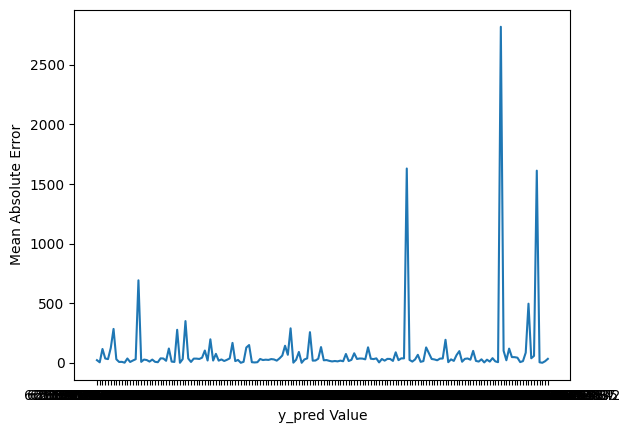

In [33]:
# SVM modelling of socio-pol to fatalities
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(train_imputed, y_train)

y_pred = model.predict(test_imputed)
viz_mse(y_test, y_pred)

## Linear Regression

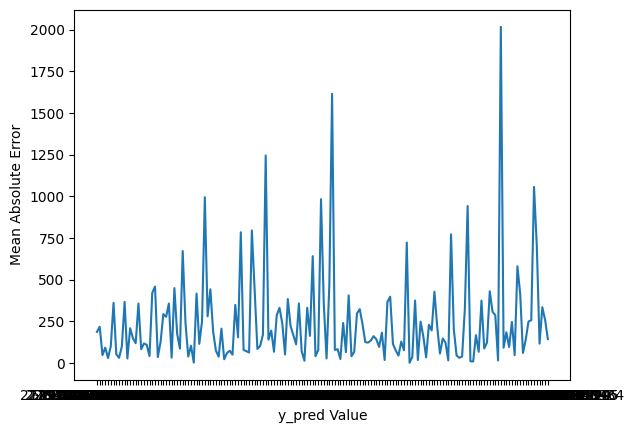

In [34]:
# Linear Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_imputed, y_train)

y_pred = reg.predict(test_imputed)
viz_mse(y_test, y_pred)
